In [ ]:
"""
Use pandas to accumulate data from multiple data files
Use plotly (visualization library) to create interactive visualizations
Use Facebooks prophet library to make time series models
Visualize the prediction by combining these technologies
"""

# Covid-19 Trends

In [30]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
#import fbprophet
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

In [2]:
country_wise = pd.read_csv("C:\\Users\\black\\Desktop\\PyforDS\\datasets\\covid\\country_wise_latest.csv")

In [3]:
country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [4]:
print("Country Wise Data shape =",country_wise.shape)
country_wise.head()

Country Wise Data shape = (187, 15)


,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [5]:
country_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

## Deaths in first 50 countries

In [6]:
import plotly.graph_objects as go


# Display death due to covid data for various countries 
fig = px.bar(country_wise.head(50), y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)
fig

## Deaths in the next 50 countries

In [7]:
fig1 = px.bar(country_wise[50:101], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)
fig1

## Deaths in the next 50 countries

In [8]:
fig1 = px.bar(country_wise[101:151], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)
fig1

## Deaths in the rest of the countries

In [9]:
fig1 = px.bar(country_wise[151:], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)
fig1

In [10]:
worldometer = pd.read_csv('C:\\Users\\black\\Desktop\\PyforDS\\datasets\\covid\\worldometer_data.csv')
worldometer_asia = worldometer[worldometer['Continent'] == 'Asia']


px.pie(worldometer_asia, values='TotalCases', names='Country/Region', 
       title='Population of Asian continent', 
       color_discrete_sequence=px.colors.sequential.RdBu)

## Code for the animated transition of confirmed cases from 22 Jan 2020 to July 2020

In [11]:
full_grouped = pd.read_csv('C:\\Users\\black\\Desktop\\PyforDS\\datasets\\covid\\full_grouped.csv')

india = full_grouped[full_grouped['Country/Region'] == 'India']
us = full_grouped[full_grouped['Country/Region'] == 'US']
russia = full_grouped[full_grouped['Country/Region'] == 'Russia']
china = full_grouped[full_grouped['Country/Region'] == 'China']
df = pd.concat([india,us,russia,china], axis=0)

# Watch as bars chart covid cases changes


fig = px.bar(df, x="Country/Region", y="Confirmed", color="Country/Region",
  animation_frame="Date", animation_group="Country/Region", range_y=[0,df['Confirmed'].max() + 100000])

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1

fig

## Histogram for deaths across all the Asian Countries

In [12]:
# bins represent the number of bars to make
# Can define x label, color, title
# marginal creates another plot (violin, box, rug)

fig = px.histogram(worldometer_asia,x = 'TotalDeaths', nbins=20, 
                   labels={'value':'Total Deaths'},title='Death Distribution of Asia Continent', 
                   marginal='violin',
                   color='Country/Region')

fig.update_layout(
    xaxis_title_text='Total Deaths', showlegend=True
)

## Box plot to represent total cases distribution across Asia and Europe

In [13]:
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median 
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers

# Complex Styling
fig = go.Figure()
# Show all points, spread them so they don't overlap and change whisker width
fig.add_trace(go.Box(y=worldometer_asia['TotalCases'], boxpoints='all', name='Asia',
                    fillcolor='blue', jitter=0.5, whiskerwidth=0.2))
fig.add_trace(go.Box(y=worldometer[worldometer['Continent'] == 'Europe']['TotalCases'], boxpoints='all', name='Europe',
                    fillcolor='red', jitter=0.5, whiskerwidth=0.2))
# Change background / grid colors
fig.update_layout(title='Asia vs Europe total cases distribution', 
                  yaxis=dict(gridcolor='rgb(255, 255, 255)',
                 gridwidth=3),
                 paper_bgcolor='rgb(243, 243, 243)',
                 plot_bgcolor='rgb(243, 243, 243)')

## Interactive globe map

In [14]:
import pycountry

worldometer['Country/Region'].replace('USA','United States', inplace=True)
worldometer['Country/Region'].replace('UAE','United Arab Emirates', inplace=True)
worldometer['Country/Region'].replace('Ivory Coast',("Côte d'Ivoire"), inplace=True)
worldometer['Country/Region'].replace('S. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('N. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('DRC','Republic of the Congo', inplace=True)
worldometer['Country/Region'].replace('Channel Islands','Jersey', inplace=True)

exceptions = []

def get_alpha_3_code(cou):
    try:
        return pycountry.countries.search_fuzzy(cou)[0].alpha_3
    except:
        exceptions.append(cou)


worldometer['iso_alpha'] = worldometer['Country/Region'].apply(lambda x : get_alpha_3_code(x))

# removeing exceptions
for exc in exceptions:
    worldometer = worldometer[worldometer['Country/Region']!=exc]
    
    
fig = px.scatter_geo(worldometer, locations="iso_alpha",
                     color="Continent", # which column to use to set the color of markers
                     hover_name="Country/Region", # column added to hover information
                     size="TotalCases", # size of markers
                     projection="orthographic")
fig

## fbprophet time-series

In [15]:
warnings.filterwarnings("ignore")

In [16]:
df3 = pd.read_csv("C:\\Users\\black\\Desktop\\PyforDS\\datasets\\covid\\time-series-19-covid-combined.csv")

In [17]:
df3.dtypes

Date               object
Country/Region     object
Province/State     object
Confirmed           int64
Recovered         float64
Deaths              int64
dtype: object

In [18]:
df3.columns

Index(['Date', 'Country/Region', 'Province/State', 'Confirmed', 'Recovered',
       'Deaths'],
      dtype='object')

In [19]:
df3.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


In [20]:
df3["Date"] = pd.to_datetime(df3.Date)

In [21]:
df3.dtypes

Date              datetime64[ns]
Country/Region            object
Province/State            object
Confirmed                  int64
Recovered                float64
Deaths                     int64
dtype: object

In [22]:
df4 = df3[["Date", "Deaths"]]

In [23]:
dict1 = {"Date":"ds", "Deaths":"y"}

In [24]:
df4.rename(columns = dict1, inplace=True)

In [25]:
df4.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [38]:
data = pd.read_csv("C:\\Users\\black\\Desktop\\PyforDS\\datasets\\covid\\case_time_series.csv")

In [39]:
Y = data.iloc[61:,1].values #Stores Daily Confirmed
R = data.iloc[61:,3].values #Stores Daily Recovered
D = data.iloc[61:,5].values #Stores Daily Deceased

In [40]:
X = data.iloc[61:,0] #Stores Date

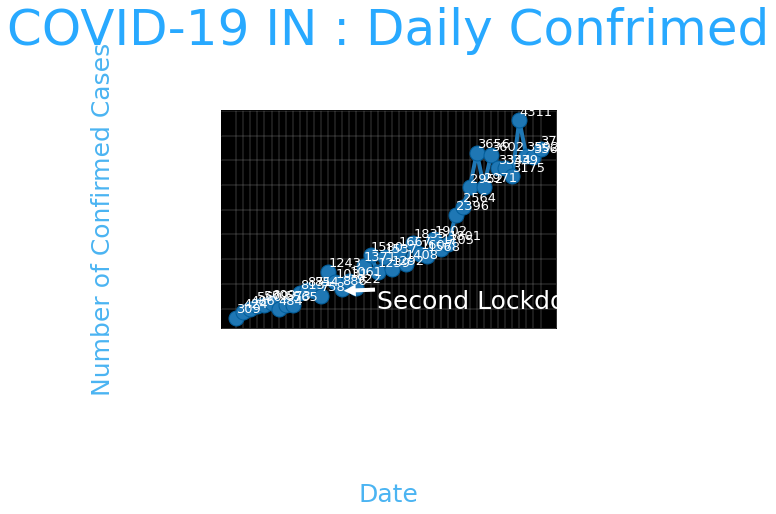

In [44]:
ax = plt.axes()
ax.grid(linewidth=0.4, color='#8f8f8f') 
  
ax.set_facecolor("black") 
ax.set_xlabel('\nDate',size=25,color='#4bb4f2')
ax.set_ylabel('Number of Confirmed Cases\n',
              size=25,color='#4bb4f2')
  
plt.xticks(rotation='vertical',size='20',color='white')
plt.yticks(size=20,color='white')
plt.tick_params(size=20,color='white')
  
for i,j in zip(X,Y):
    ax.annotate(str(j),xy=(i,j+100),color='white',size='13')
      
ax.annotate('Second Lockdown 15th April',
            xy=(15.2, 860),
            xytext=(19.9,500),
            color='white',
            size='25',
            arrowprops=dict(color='white',
                            linewidth=0.025))
  
plt.title("COVID-19 IN : Daily Confrimed\n",
          size=50,color='#28a9ff')
  
ax.plot(X,Y,
        color='#1F77B4',
        marker='o',
        linewidth=4,
        markersize=15,
        markeredgecolor='#035E9B')

## Building model

In [15]:
from fbprophet import Prophet

In [16]:
model = Prophet(daily_seasonality=True)

In [ ]:
model.fit(df4)

In [ ]:
future = model.make_future_dataframe(periods=365)

In [ ]:
df4.tail()

In [ ]:
future.tail()

## Predicting

In [ ]:
pred = model.predict(future)

In [ ]:
pred

In [ ]:
pred[["ds","yhat","yhat_lower","yhat_upper"]].head()

## Forecasting

In [ ]:
#forecasting
model.plot(pred)

In [ ]:
#Trends: visualizing each component(Trends,Weekly):
model.plot_components(pred)